# 🧠 Handwriting Recognition with CNN (MNIST Dataset)

In [5]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [8]:
# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [9]:
# Step 3: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Step 5: Train the Model
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=5,
                    batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.8398 - loss: 0.5116 - val_accuracy: 0.9803 - val_loss: 0.0586
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9721 - loss: 0.0953 - val_accuracy: 0.9869 - val_loss: 0.0404
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9793 - loss: 0.0658 - val_accuracy: 0.9863 - val_loss: 0.0362
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9840 - loss: 0.0563 - val_accuracy: 0.9908 - val_loss: 0.0287
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9905 - val_loss: 0.0297


In [12]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9886 - loss: 0.0349
Test Accuracy: 0.9905


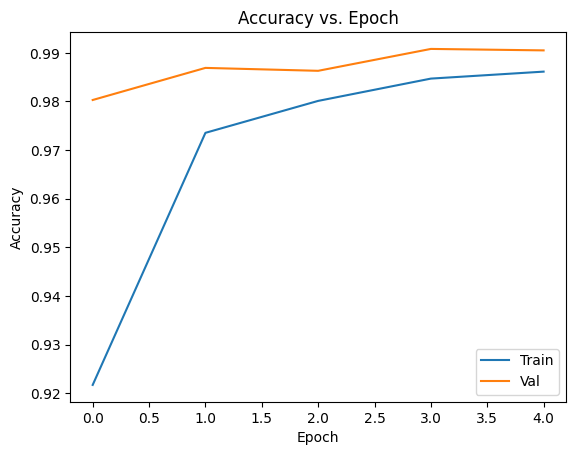

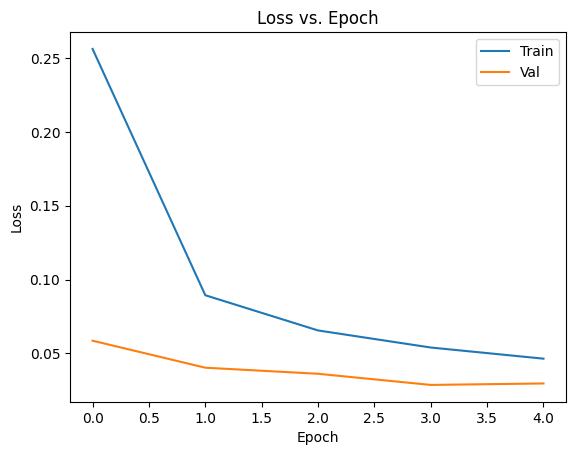

In [21]:
# Step 7: Plot Accuracy/Loss

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'],     label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'],     label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


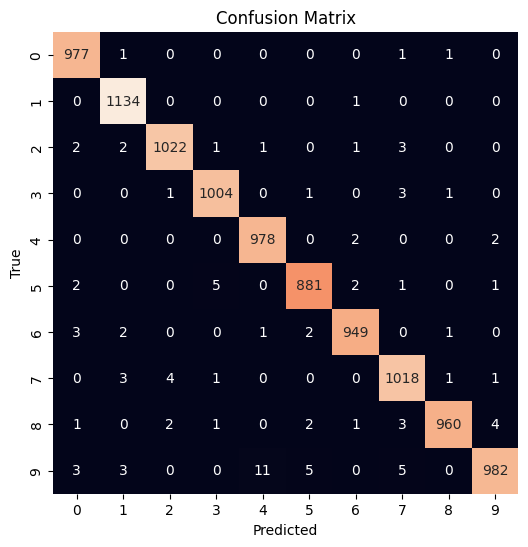

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


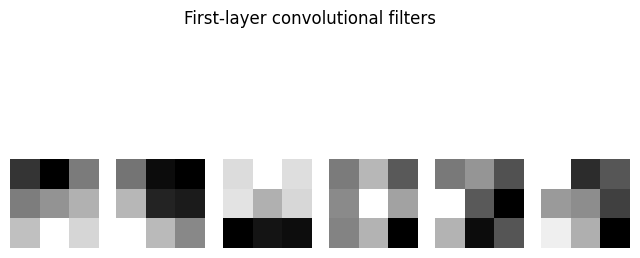

In [24]:
# Grab the first Conv2D layer’s filters
filters, _ = model.layers[0].get_weights()
filters = (filters - filters.min()) / (filters.max() - filters.min())  # normalize to [0,1]

plt.figure(figsize=(8,4))
for i in range(6):                     # show first 6 filters
    plt.subplot(1,6,i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('First-layer convolutional filters')
plt.show()


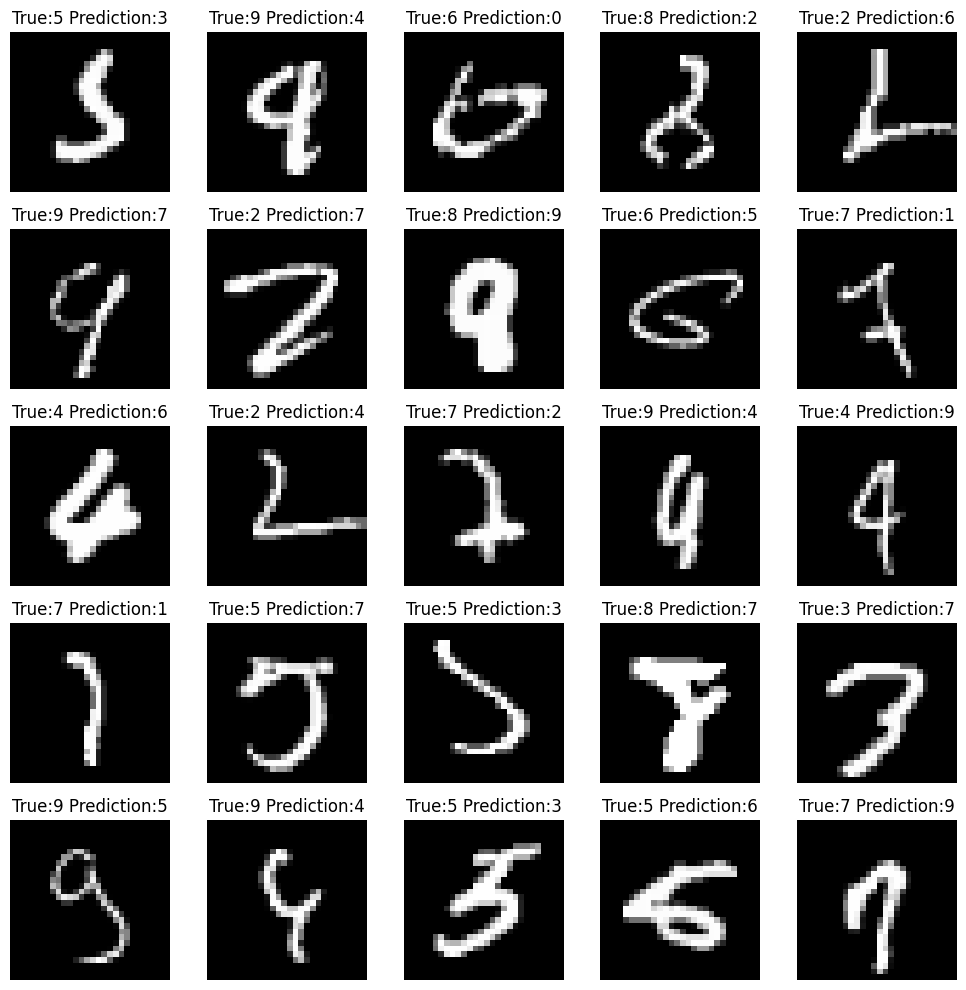

In [27]:
mis = np.where(y_pred != y_test)[0][:25]   # first 25 mistakes
plt.figure(figsize=(10,10))
for idx, wrong in enumerate(mis):
    ax = plt.subplot(5,5,idx+1)
    plt.imshow(x_test[wrong].reshape(28,28), cmap='gray')
    plt.title(f'True:{y_test[wrong]} Prediction:{y_pred[wrong]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
